In [1]:
%matplotlib inline
import statsmodels.api as sm

import matplotlib.pyplot as plt

import pandas as pd

START = '2014-07-01'
MID = '2015-01-01'
END =  '2015-01-14'

dta = pd.read_csv('../data/nyc_taxi.csv')

dta['timestamp'] = pd.to_datetime(dta['timestamp'])

truth = dta[(dta.timestamp>START) & (dta.timestamp<END)]['value']

tmp_dta = dta[dta.timestamp<MID]

station_check = sm.tsa.stattools.adfuller(tmp_dta['value'].values)

"""
return:
adf : float
Test statistic

pvalue : float
MacKinnon’s approximate p-value based on MacKinnon (1994)

usedlag : int
Number of lags used.

nobs : int
Number of observations used for the ADF regression and calculation of the critical values.

critical values : dict
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)

icbest : float
The maximized information criterion if autolag is not None.

regresults : RegressionResults instance
The

resstore : (optional) instance of ResultStore
an instance of a dummy class with results attached as attributes
"""

print station_check
print round(station_check[1],4)




(-12.237904563310433, 1.0181603465140996e-22, 37, 8794, {'5%': -2.861868722081236, '1%': -3.4310938264531035, '10%': -2.5669449737801151}, 148128.97895027901)
0.0


acf [ 1.          0.96986908  0.89962525  0.80018296  0.68552447  0.56218386
  0.43783109  0.31273857  0.18948689  0.06947117 -0.04145282 -0.13929007
 -0.22054202 -0.28178856 -0.32285173 -0.34379916 -0.34723058 -0.33497072
 -0.31060711 -0.27740709 -0.24125759 -0.20607841 -0.17776881 -0.15800795
 -0.14811968 -0.14824565 -0.15838118 -0.17731935 -0.20306461 -0.23077786
 -0.2577137  -0.2788412  -0.29168987 -0.29303836 -0.28075541 -0.25184135
 -0.20588125 -0.14258721 -0.06477629  0.02427827  0.12127857]
pacf [ 1.          0.9699789  -0.69376767 -0.1614066   0.08719272 -0.10758843
 -0.0028674  -0.16796161 -0.06519821 -0.04400681  0.0545531   0.02031478
 -0.01905027  0.0763467  -0.01868648  0.04401302 -0.01439803  0.00902553
 -0.0201004  -0.04144852 -0.10060719 -0.07258497 -0.12669174 -0.04703197
 -0.04775565 -0.09168995 -0.06519813 -0.05653792 -0.01047046  0.06968836
 -0.01429926  0.07200871  0.01473109  0.06764118  0.08083683  0.10948318
  0.06997028  0.07447994  0.04047098  0.02832406  0.0

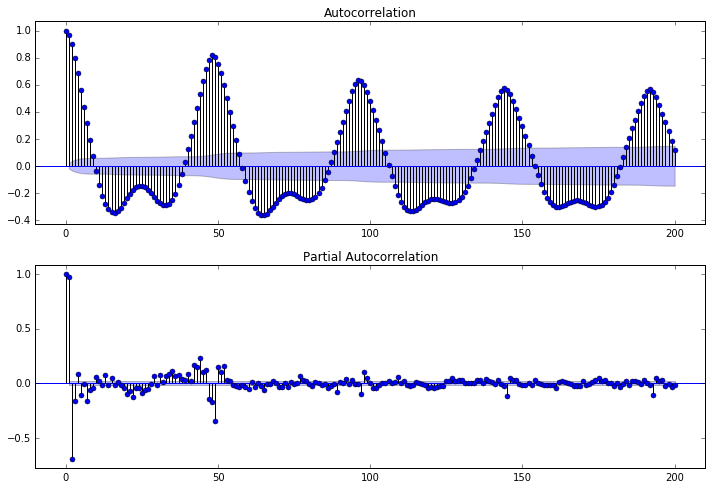

In [5]:
print 'acf',sm.tsa.acf(tmp_dta['value'].values)
print 'pacf',sm.tsa.pacf(tmp_dta['value'].values)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tmp_dta['value'].values.squeeze(), lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tmp_dta['value'].values, lags=200, ax=ax2)

df = pd.Series(data=tmp_dta['value'].values,index=tmp_dta['timestamp'].values).astype(float)

print df.head()



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 8832
Model:                    ARMA(10, 2)   Log Likelihood              -74827.674
Method:                       css-mle   S.D. of innovations           1156.482
Date:                Tue, 23 Aug 2016   AIC                         149683.347
Time:                        16:15:29   BIC                         149782.553
Sample:                    07-01-2014   HQIC                        149717.136
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.526e+04    175.992     86.719      0.000    1.49e+04    1.56e+04
ar.L1.y        2.0146      0.118     17.017      0.000       1.783       2.247
ar.L2.y       -1.0870      0.239     -4.553      0.0

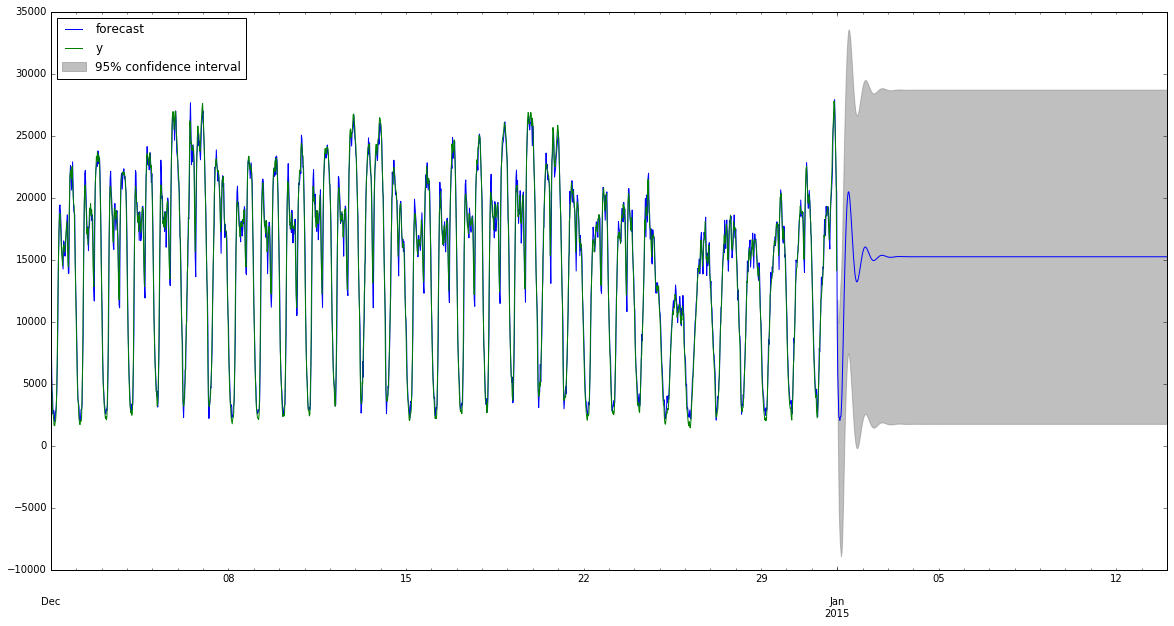

In [7]:
arma_mod = sm.tsa.ARMA(df, order=(10,2))
arma_res = arma_mod.fit(trend='c', disp=-1)


print arma_res.summary()

fig, ax = plt.subplots(figsize=(20,10))

TMP_START = '2014-12-01'

fig = arma_res.plot_predict(start=TMP_START, end=END, ax=ax)
legend = ax.legend(loc='upper left')
plt.show()